In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [92]:
df = pd.read_excel(r'C:/Users/xmari/Downloads/car_loan_data_2.xlsx')
df.head(5)

,id,first_name,last_name,gender,zip_code,car_prod_year,age,loan_amt,car_value,income_net,payment_hist
0,968,Sapphire,Doblin,Female,30-003,2016,25,8204,12065,6369,Poor
1,272,Merrel,Darragh,Male,30-003,2014,37,11734,12352,3585,Fair
2,952,Sayers,Booy,Male,50-001,2010,43,10699,12441,20740,Good
3,318,Paquito,Merton,Male,30-003,2005,70,9631,12508,16982,Fair
4,90,Rolfe,Simondson,Male,50-001,2023,17,8309,13086,24272,Good


In [93]:
df.shape

(1000, 11)

In [94]:
for column in df.columns:
    print(column, ':', df[column].dtype)

id : int64
first_name : object
last_name : object
gender : object
zip_code : object
car_prod_year : int64
age : int64
loan_amt : int64
car_value : int64
income_net : int64
payment_hist : object


In [95]:
df['payment_hist'].unique()

array(['Poor', 'Fair', 'Good', ' ', '.'], dtype=object)

In [96]:
for column in df.columns:
    if df[column].dtype == 'object' and column in ('zip_code','gender', 'payment_hist'):  
        print(column, ': ', df[column].unique())
    else:
        continue

gender :  ['Female' 'Male']
zip_code :  ['30-003' '50-001' '81-701']
payment_hist :  ['Poor' 'Fair' 'Good' ' ' '.']


In [97]:
df['payment_hist'] = df['payment_hist'].replace('', 'missing')
df['payment_hist'] = df['payment_hist'].replace('.', 'missing')
df['payment_hist'] = df['payment_hist'].replace(' ', 'missing')

In [98]:
for column in df.columns:
    print(column, ':', sum(df[column].isna()))

id : 0
first_name : 0
last_name : 0
gender : 0
zip_code : 0
car_prod_year : 0
age : 0
loan_amt : 0
car_value : 0
income_net : 0
payment_hist : 0


In [99]:
df.drop(['id', 'first_name', 'last_name'], axis=1, inplace=True)

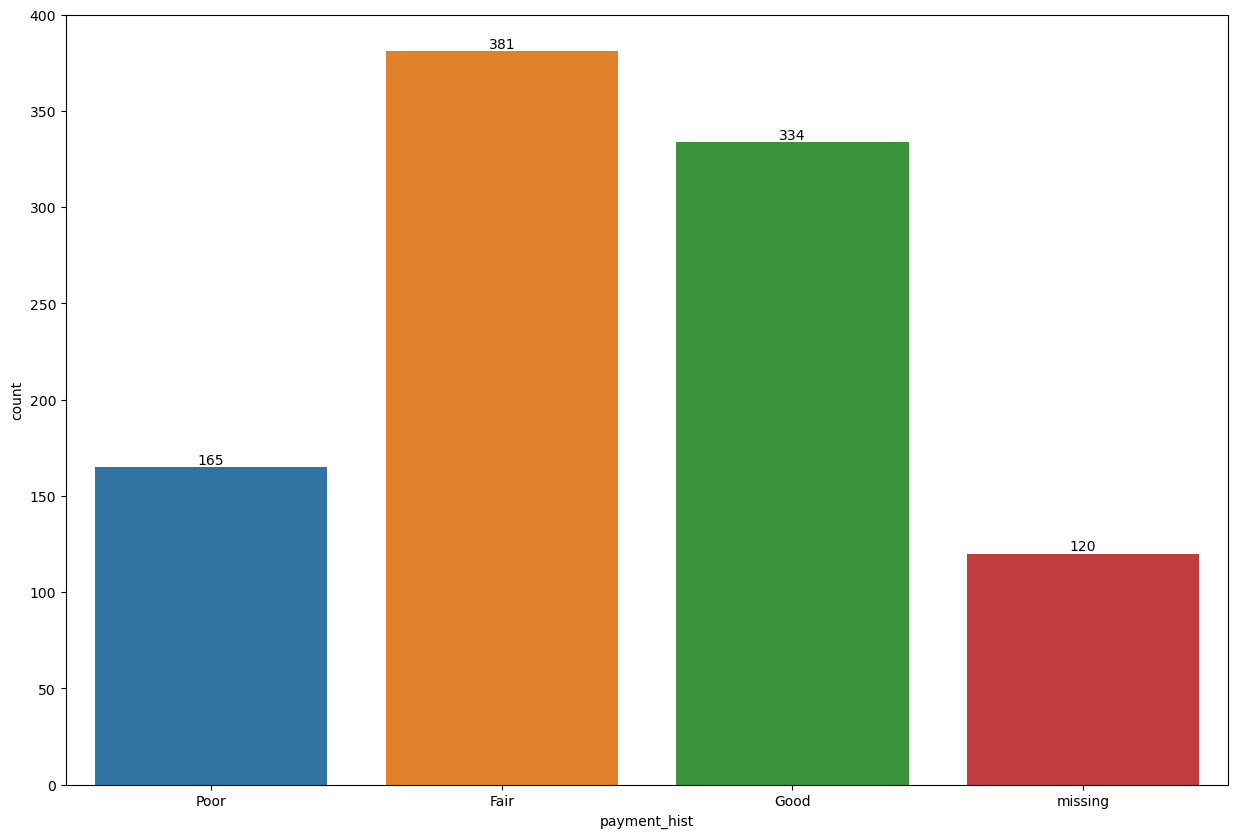

In [100]:
for column in df.columns:
    if column in ('payment_hist'):
        plt.figure(figsize=(15, 10)) 
        ax = sns.countplot(x=column, data=df)
        
        for patch in ax.patches:  
            count = int(patch.get_height())
            ax.annotate(f'{count}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom')
        plt.show()
        

In [101]:
df['payment_hist'] = df['payment_hist'].replace('missing', np.nan)
df.dropna()

,gender,zip_code,car_prod_year,age,loan_amt,car_value,income_net,payment_hist
0,Female,30-003,2016,25,8204,12065,6369,Poor
1,Male,30-003,2014,37,11734,12352,3585,Fair
2,Male,50-001,2010,43,10699,12441,20740,Good
3,Male,30-003,2005,70,9631,12508,16982,Fair
4,Male,50-001,2023,17,8309,13086,24272,Good
...,...,...,...,...,...,...,...,...
995,Male,30-003,2004,33,180263,248639,7089,Fair
996,Female,81-701,2012,54,124339,248679,3256,Fair
997,Female,81-701,2007,45,180445,248891,8419,Good
998,Male,30-003,1998,62,124735,249470,28860,Good


In [102]:
df.shape

(1000, 8)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   zip_code       1000 non-null   object
 2   car_prod_year  1000 non-null   int64 
 3   age            1000 non-null   int64 
 4   loan_amt       1000 non-null   int64 
 5   car_value      1000 non-null   int64 
 6   income_net     1000 non-null   int64 
 7   payment_hist   880 non-null    object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


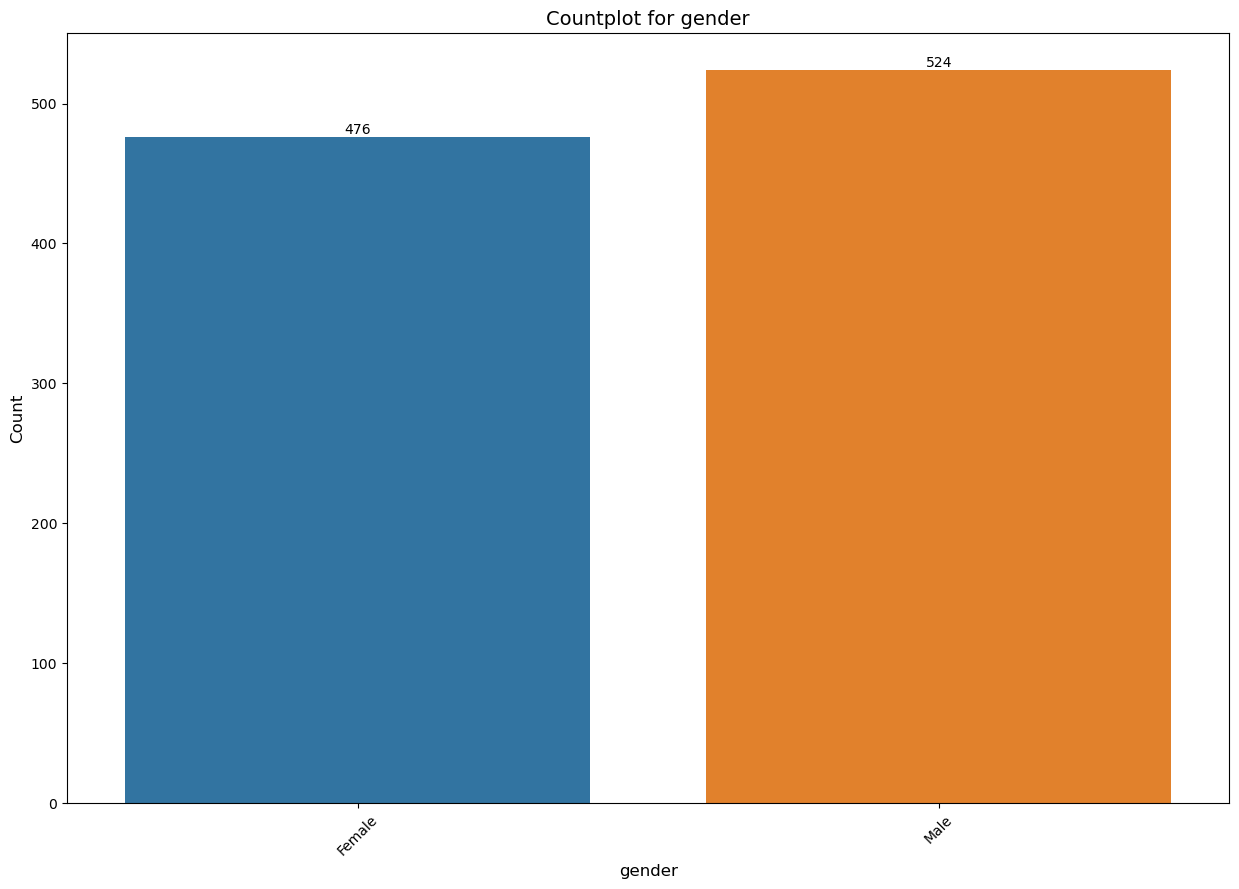

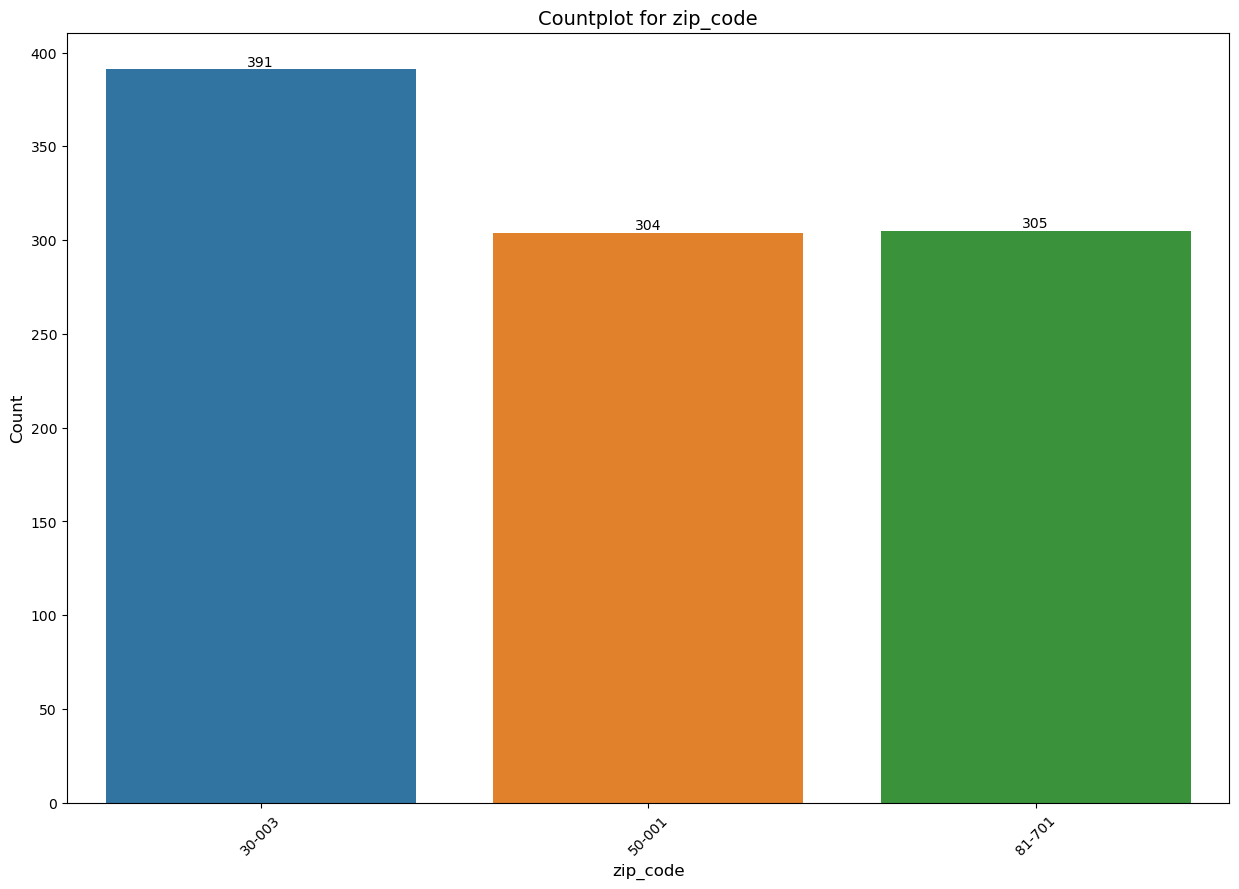

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

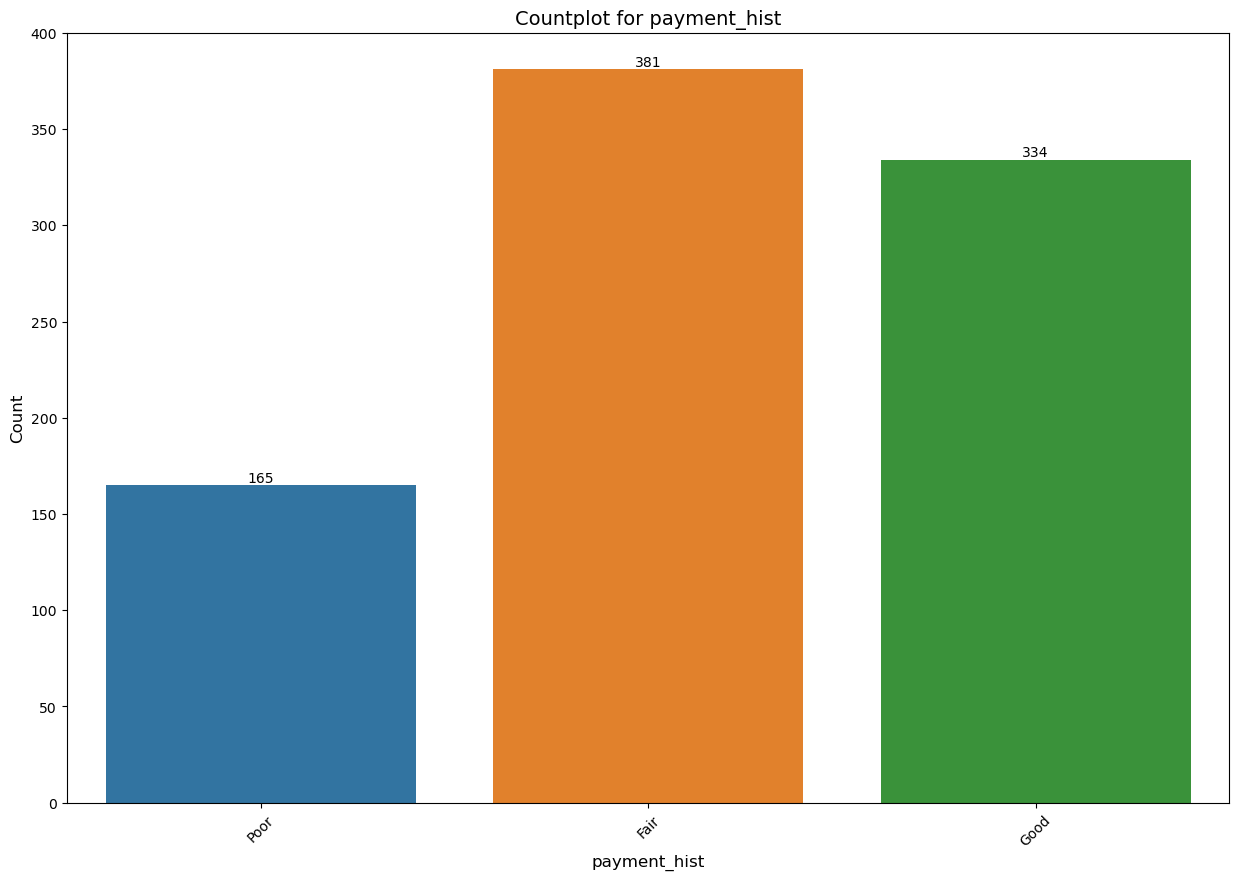

In [104]:
for column in df.columns:
    if column in df.columns:
        plt.figure(figsize=(15, 10)) 
        
        # Check the data type of the column
        if df[column].dtype == 'object':
            # Categorical variable: Use countplot
            ax = sns.countplot(x=column, data=df)
            
            for patch in ax.patches:  
                count = int(patch.get_height())
                ax.annotate(f'{count}', 
                            (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                            ha='center', va='bottom')
            
            plt.title(f'Countplot for {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=45)
        
        plt.show()


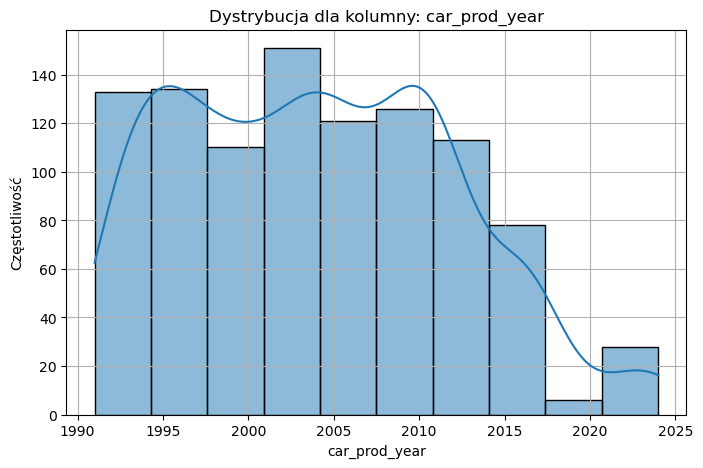

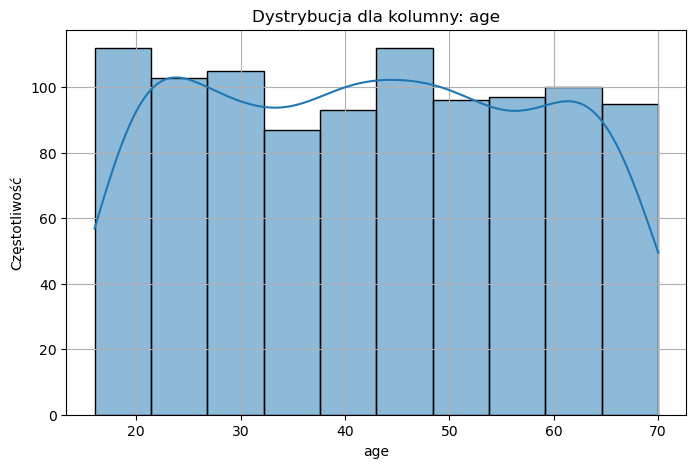

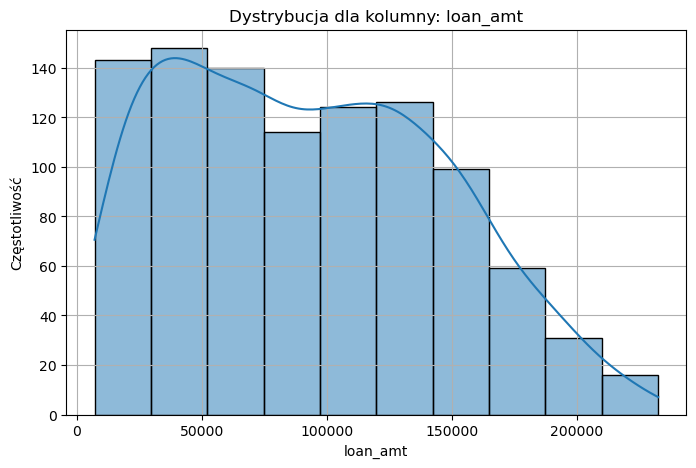

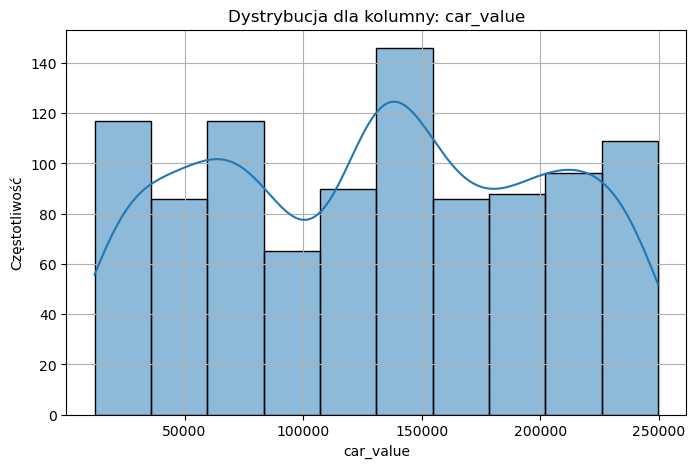

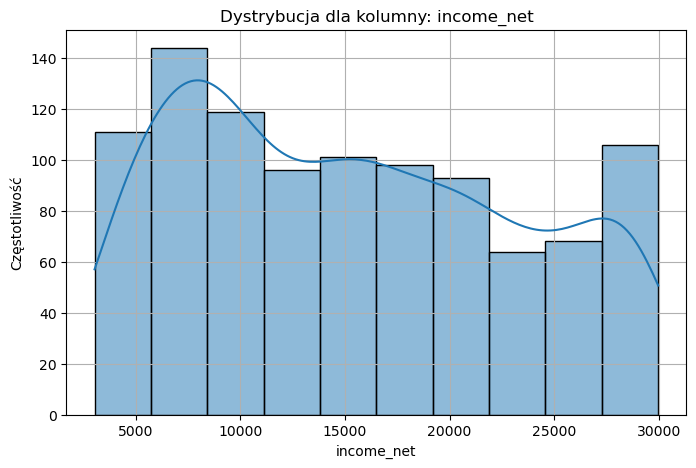

In [86]:
# Filtrujemy kolumny typu int64
int_columns = df.select_dtypes(include=['int64']).columns

# Tworzymy wykresy
for col in int_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Dystrybucja dla kolumny: {col}')
    plt.xlabel(col)
    plt.ylabel('Częstotliwość')
    plt.grid(True)
    plt.show()

Column car_prod_year: 0 outliers


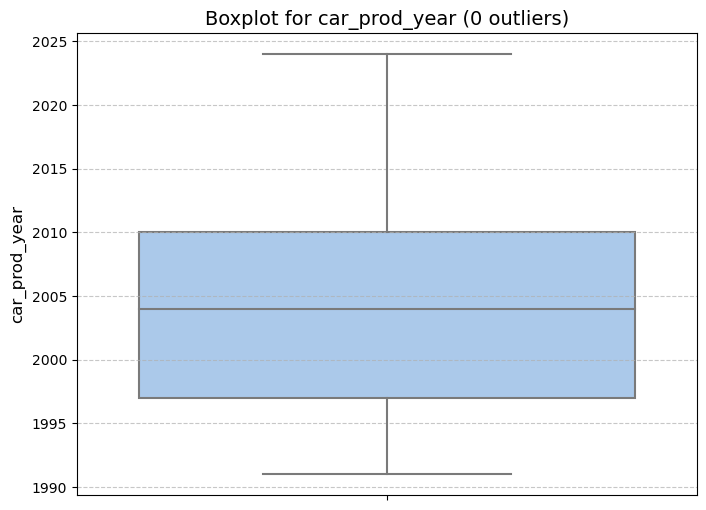

Column age: 0 outliers


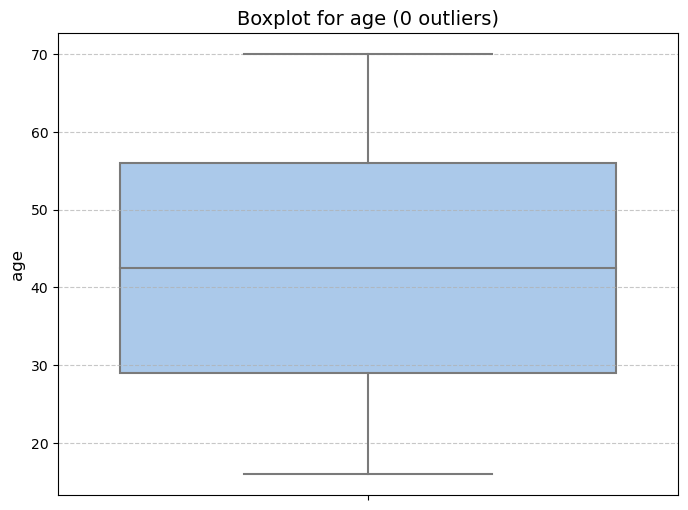

Column loan_amt: 0 outliers


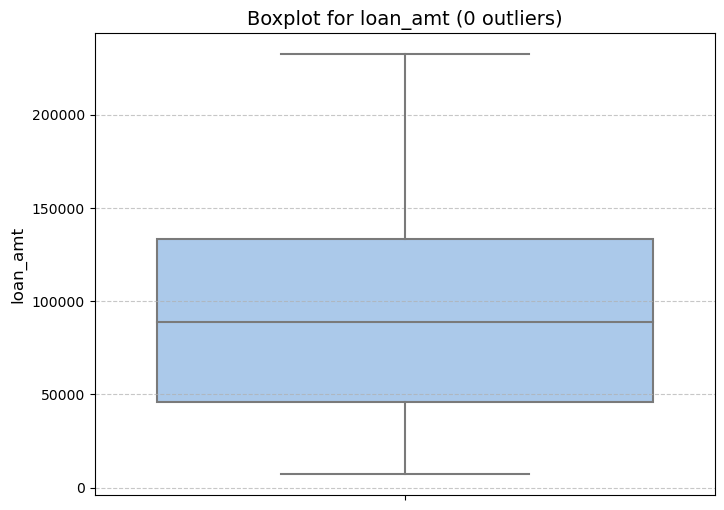

Column car_value: 0 outliers


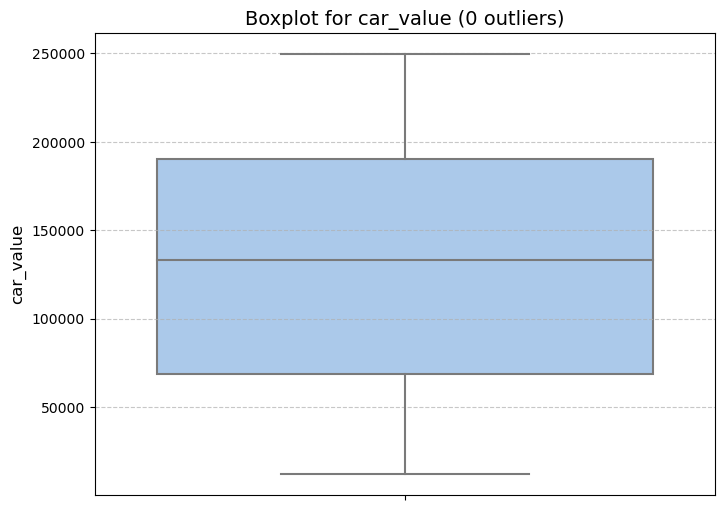

Column income_net: 0 outliers


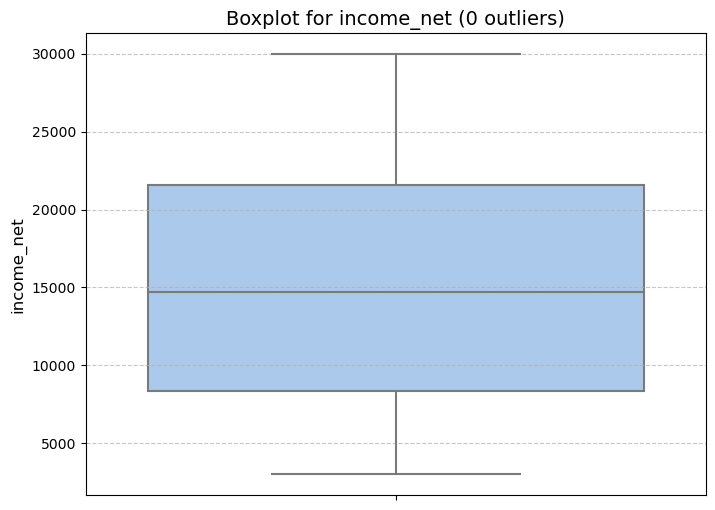

In [106]:
int64_columns = df.select_dtypes(include=['int64']).columns

# Funkcja do diagnostyki wartosci odstajacych
def count_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Tworzymy boxploty dla kazdej kolumny int64
for column in int64_columns:
    outliers_count = count_outliers(df[column])
    print(f'Column {column}: {outliers_count} outliers')

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], palette="pastel")
    plt.title(f'Boxplot for {column} ({outliers_count} outliers)', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

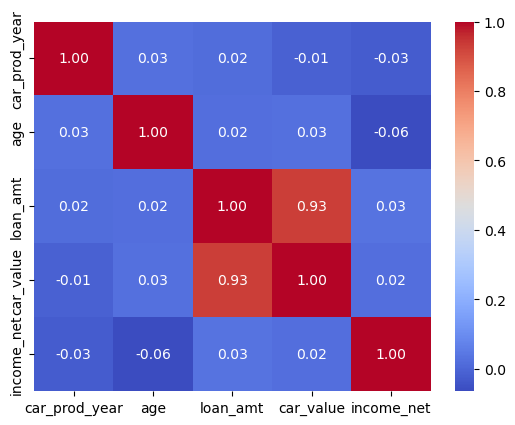

In [90]:
#mapa kolelacji dla zmiennych
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler

# Skalowanie kolumn numerycznych
numerical_columns = ['car_prod_year', 'age', 'loan_amt', 'car_value', 'income_net']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [66]:
df.head()

,gender,zip_code,car_prod_year,age,loan_amt,car_value,income_net,payment_hist
0,Female,30-003,1.488528,-1.102578,-1.568401,-1.708731,-1.143997,Poor
1,Male,30-003,1.238250,-0.346135,-1.502790,-1.704591,-1.498232,Fair
2,Male,50-001,0.737694,0.032086,-1.522027,-1.703307,0.684561,Good
3,Male,30-003,0.111999,1.734081,-1.541878,-1.702340,0.206395,Fair
4,Male,50-001,2.364500,-1.606873,-1.566450,-1.694002,1.133970,Good


In [67]:
from sklearn.preprocessing import LabelEncoder

# Kodowanie kolumn kategorycznych z LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # Male=1, Female=0

In [68]:
df.head()

,gender,zip_code,car_prod_year,age,loan_amt,car_value,income_net,payment_hist
0,0,30-003,1.488528,-1.102578,-1.568401,-1.708731,-1.143997,Poor
1,1,30-003,1.238250,-0.346135,-1.502790,-1.704591,-1.498232,Fair
2,1,50-001,0.737694,0.032086,-1.522027,-1.703307,0.684561,Good
3,1,30-003,0.111999,1.734081,-1.541878,-1.702340,0.206395,Fair
4,1,50-001,2.364500,-1.606873,-1.566450,-1.694002,1.133970,Good


In [69]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding dla zip_code
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
zip_code_encoded = encoder.fit_transform(df[['zip_code']])

# Dodanie zakodowanych wartości do DataFrame
zip_code_df = pd.DataFrame(zip_code_encoded, columns=encoder.get_feature_names_out(['zip_code']))
df = pd.concat([df.drop(columns=['zip_code']), zip_code_df], axis=1)

C:\Users\xmari\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
df.head()

,gender,car_prod_year,age,loan_amt,car_value,income_net,payment_hist,zip_code_30-003,zip_code_50-001,zip_code_81-701
0,0,1.488528,-1.102578,-1.568401,-1.708731,-1.143997,Poor,1.0,0.0,0.0
1,1,1.238250,-0.346135,-1.502790,-1.704591,-1.498232,Fair,1.0,0.0,0.0
2,1,0.737694,0.032086,-1.522027,-1.703307,0.684561,Good,0.0,1.0,0.0
3,1,0.111999,1.734081,-1.541878,-1.702340,0.206395,Fair,1.0,0.0,0.0
4,1,2.364500,-1.606873,-1.566450,-1.694002,1.133970,Good,0.0,1.0,0.0
